- Which product was purchased most frequently in the café?

- In which month were the highest earnings, and how much was it?

- How many coffees were sold in the shop, and how many as takeaway?

- What percentage of people paid in cash?

In [1]:
import pandas as pd
data = r"C:\Users\maria\Desktop\bazy danych\dirty_cafe_sales.csv"

df = pd.read_csv(data)

In [2]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [3]:
df['Transaction ID'].duplicated().sum()

np.int64(0)

In [4]:
df['Transaction ID'].duplicated().any()

np.False_

In [5]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [6]:
missing_values = df.isna().sum()
missing_values

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [7]:
percentage_missing_values = missing_values / len(df) *100
percentage_missing_values

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

# Which product was purchased most frequently in the café?

In [8]:
unique_items = df['Item'].unique()
unique_items

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [9]:
import numpy as np
df['Item'] = df['Item'].replace(['UNKNOWN', 'ERROR'], np.nan)

In [10]:
df = df.dropna(subset = ['Item']).copy()

In [11]:
df['Item']

0         Coffee
1           Cake
2         Cookie
3          Salad
4         Coffee
          ...   
9993    Smoothie
9995      Coffee
9997      Coffee
9998      Cookie
9999    Sandwich
Name: Item, Length: 9031, dtype: object

In [12]:
df['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

In [13]:
unique_v = df['Quantity'].unique()
unique_v

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [14]:
df['Quantity'] = df['Quantity'].replace(['ERROR', 'UNKNOWN'], np.nan)

In [15]:
df = df.dropna(subset = ['Quantity']).copy()

In [16]:
df['Quantity'] = df['Quantity'].astype(int)

In [17]:
df['Quantity']

0       2
1       4
2       4
3       2
4       2
       ..
9993    2
9995    2
9997    4
9998    3
9999    3
Name: Quantity, Length: 8611, dtype: int64

In [18]:
df.groupby('Item')['Quantity'].sum().sort_values(ascending = False)

Item
Juice       3373
Coffee      3368
Cake        3329
Salad       3310
Sandwich    3245
Smoothie    3221
Tea         3154
Cookie      3090
Name: Quantity, dtype: int64

In [19]:
top_product = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(1)

print(f"Most frequently purchased product is: {top_product.index[0]} with {top_product.values[0]} items sold.")

Most frequently purchased product is: Juice with 3373 items sold.


# In which month were the highest earnings, and how much was it?

In [20]:
unique_cash = df['Total Spent'].unique()
unique_cash

array(['4.0', '12.0', 'ERROR', '10.0', '20.0', '16.0', '25.0', '8.0',
       '5.0', '15.0', '6.0', nan, 'UNKNOWN', '2.0', '9.0', '1.0', '3.0',
       '7.5', '4.5', '1.5'], dtype=object)

In [21]:
df['Total Spent'] = df['Total Spent'].replace(['ERROR', 'UNKNOWN'], np.nan)

In [22]:
unique_cash = df['Total Spent'].unique()
unique_cash

array(['4.0', '12.0', nan, '10.0', '20.0', '16.0', '25.0', '8.0', '5.0',
       '15.0', '6.0', '2.0', '9.0', '1.0', '3.0', '7.5', '4.5', '1.5'],
      dtype=object)

In [23]:
df['Total Spent'] = df['Total Spent'].astype(float)
total = df['Total Spent'].sum()

In [24]:
unique_date = df['Transaction Date'].unique()
unique_date

array(['2023-09-08', '2023-05-16', '2023-07-19', '2023-04-27',
       '2023-06-11', '2023-03-31', '2023-10-28', '2023-12-31',
       '2023-11-07', 'ERROR', '2023-05-03', '2023-06-01', '2023-11-15',
       '2023-06-10', '2023-02-24', '2023-03-25', '2023-01-15',
       '2023-03-30', '2023-12-01', '2023-09-18', '2023-06-03',
       '2023-12-13', '2023-04-20', '2023-04-10', '2023-03-11',
       '2023-08-15', '2023-10-09', '2023-05-28', '2023-04-29',
       '2023-06-08', '2023-06-29', '2023-04-17', '2023-12-22',
       '2023-01-10', '2023-10-02', '2023-02-23', '2023-03-22',
       '2023-11-03', '2023-03-02', '2023-06-26', '2023-05-02',
       '2023-09-05', '2023-01-08', '2023-11-25', '2023-12-05',
       '2023-06-27', '2023-10-07', '2023-09-30', '2023-05-27',
       '2023-10-20', '2023-10-03', '2023-10-27', '2023-01-31',
       '2023-06-19', '2023-12-14', '2023-07-16', '2023-02-22', nan,
       '2023-06-02', '2023-06-15', '2023-12-09', '2023-04-18',
       '2023-10-29', '2023-04-30', '2023-

In [25]:
df['Transaction Date'] = df['Transaction Date'].replace(['UNKNOWN', 'ERROR'], np.nan)

In [26]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [27]:
df['Transaction Date']

0      2023-09-08
1      2023-05-16
2      2023-07-19
3      2023-04-27
4      2023-06-11
          ...    
9993   2023-10-20
9995   2023-08-30
9997   2023-03-02
9998   2023-12-02
9999   2023-11-07
Name: Transaction Date, Length: 8611, dtype: datetime64[ns]

In [28]:
df['Transaction Date'].min()

Timestamp('2023-01-01 00:00:00')

In [29]:
df['Transaction Date'].max()

Timestamp('2023-12-31 00:00:00')

In [30]:
df.groupby(df['Transaction Date'].dt.month).size()

Transaction Date
1.0     708
2.0     624
3.0     712
4.0     659
5.0     661
6.0     700
7.0     687
8.0     686
9.0     674
10.0    733
11.0    697
12.0    674
dtype: int64

In [31]:
monthly = df.groupby(df['Transaction Date'].dt.month)['Total Spent'].sum()

In [32]:
number_to_month = {
    1.0: "January",
    2.0: "February",
    3.0: "March",
    4.0: "April",
    5.0: "May",
    6.0: "June",
    7.0: "July",
    8.0: "August",
    9.0: "September",
    10.0: "October",
    11.0: "November",
    12.0: "December"}

In [33]:
monthly.index = monthly.index.map(number_to_month)

In [34]:
max_month = monthly.idxmax()
max_value = monthly.max()
print(f'Month: {max_month}, Total Spent: {max_value}')

Month: October, Total Spent: 6170.0


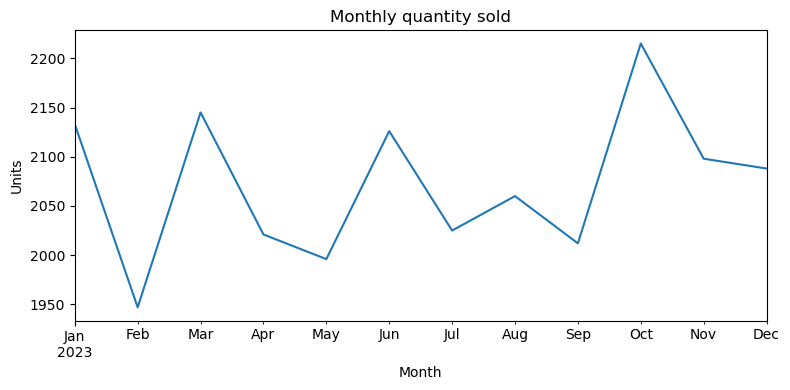

In [37]:
import matplotlib.pyplot as plt

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
monthly = df.set_index('Transaction Date').resample('ME')['Quantity'].sum()
plt.figure(figsize=(8,4))
monthly.plot()
plt.title('Monthly quantity sold'); plt.ylabel('Units'); plt.xlabel('Month'); plt.tight_layout()

# How many coffees were sold in the shop, and how many as takeaway?

In [ ]:
place = df['Location'].unique()
place

In [ ]:
df['Location'] = df['Location'].replace(['ERROR', 'UNKNOWN'], np. nan)

In [ ]:
df['Location'].value_counts()

In [ ]:
df.groupby(df['Location'])['Total Spent'].sum()

In [ ]:
df.groupby(df['Location'])['Item'].value_counts()

In [ ]:
coffee_sales = df[df['Item'].str.contains("coffee", case=False, na=False)] \
    .groupby("Location")['Quantity'].sum()

In [ ]:
in_store = coffee_sales['In-store']
takeaway = coffee_sales['Takeaway']

print(f"The number of coffees sold in-store: {in_store}. The number of coffees sold takeaway: {takeaway}.")

# What percentage of people paid in cash?

In [ ]:
payment = df['Payment Method'].unique()
payment

In [ ]:
df['Payment Method'] = df['Payment Method'].replace(['ERROR', 'UNKNOWN'], np.nan)

In [ ]:
df['Payment Method'].value_counts()

In [ ]:
cash = (df['Payment Method'] == 'Cash').sum()
cash

In [ ]:
every_method = df['Payment Method'].value_counts().sum()
every_method

In [ ]:
how_many_cash = (cash / every_method) * 100
how_many_cash = how_many_cash.round(2)

In [ ]:
print(f'The percentage of people who paid in cash out of all known payment methods is: {how_many_cash}')

In [39]:
unknown_methods = df['Payment Method'].isna().sum()

unknown_percent = (unknown_methods / len(df)) * 100

print(f"Number of unknown payment methods: {unknown_methods}")
print(f"Percentage of unknown payment methods: {unknown_percent:.2f}%")

Number of unknown payment methods: 2214
Percentage of unknown payment methods: 25.71%
